##CONFIDENCE MEASURE FOR VIRTUAL INTERVIEWS

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os
import time

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
base_dir = 'train/'
_dir  = ['confident','unconfident' ]

Original Size of Image is  (48, 48, 3)
Resized Size of Image is  (64, 64, 3)


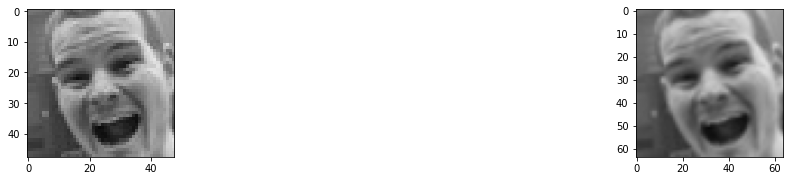

In [ ]:
fig = plt.figure(figsize =(20, 32))
file = glob(os.path.join(base_dir, _dir[0], 'Training_11204.jpg'))
img = cv2.imread(file[0])
print("Original Size of Image is ", img.shape)
ax = fig.add_subplot(10, 2,1)
imgplot = plt.imshow(img)
resized_img = cv2.resize(img, (64, 64))
print("Resized Size of Image is ", resized_img.shape)
ax = fig.add_subplot(10, 2,2)
imgplot = plt.imshow(resized_img)
plt.show()

**Loading Image**

In [ ]:
train_images = [] 
train_labels = []
print('Loading directory' + base_dir + '{}'.format(_dir[0]))
files = glob(os.path.join(base_dir, _dir[0], '*.jpg'))
for file in files:
  img = cv2.imread(file)
  train_images.append(cv2.resize(img, (64,64)))
  train_labels.append(0)

Loading directorytrain/confident


In [ ]:
print('Loading directory' + base_dir + '{}'.format(_dir[1]))
files = glob(os.path.join(base_dir, _dir[1], '*.jpg'))
for file in files:
  img = cv2.imread(file)
  train_images.append(cv2.resize(img, (64,64)))
  train_labels.append(1)

len(train_images), len(train_labels)

Loading directorytrain/unconfident


(28707, 28707)

Training And Splitting 

In [ ]:

x_train, x_test, y_train, y_test =  train_test_split(train_images,train_labels, test_size = 0.2, stratify=train_labels)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

x_train, y_train = np.asarray(x_train), np.asarray(y_train)
x_test, y_test = np.asarray(x_test), np.asarray(y_test)
print(x_train.shape, y_train.shape)

(22965, 64, 64, 3) (22965, 2)


Model -1

In [ ]:
model = Sequential()

size = 32
model.add(Conv2D(size, (3, 3), padding='same', input_shape=(64, 64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(size*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(size*4, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(size*8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))#softmax is used to get maximun value in a row

# initiate RMSprop optimizer
opt = tf.keras.optimizers.SGD(lr=0.0005)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


C:\Program Files\Python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()
#these will print summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                    

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=40, batch_size=512, )
stop = time.time()

Epoch 1/40
45/45 [==============================] - 74s 2s/step - loss: 1.2565 - accuracy: 0.5340 - val_loss: 0.6916 - val_accuracy: 0.5792
Epoch 2/40
45/45 [==============================] - 70s 2s/step - loss: 0.7764 - accuracy: 0.5462 - val_loss: 0.6786 - val_accuracy: 0.5864
Epoch 3/40
45/45 [==============================] - 70s 2s/step - loss: 0.7454 - accuracy: 0.5437 - val_loss: 0.6754 - val_accuracy: 0.5850
Epoch 4/40
45/45 [==============================] - 70s 2s/step - loss: 0.7227 - accuracy: 0.5587 - val_loss: 0.6733 - val_accuracy: 0.5920
Epoch 5/40
45/45 [==============================] - 70s 2s/step - loss: 0.7105 - accuracy: 0.5666 - val_loss: 0.6702 - val_accuracy: 0.5928
Epoch 6/40
45/45 [==============================] - 70s 2s/step - loss: 0.7020 - accuracy: 0.5706 - val_loss: 0.6670 - val_accuracy: 0.5993
Epoch 7/40
45/45 [==============================] - 70s 2s/step - loss: 0.6992 - accuracy: 0.5707 - val_loss: 0.6662 - val_accuracy: 0.5980
Epoch 8/40
45/45 [==

In [ ]:
print(f"Training time: {stop - start}s")

Training time: 5560.748686313629s


In [ ]:
model.save('model1.h5')

In [ ]:
np.argmax(model.predict(x_train[0].reshape(1,64, 64, 3))), y_train[0]

(1, array([1., 0.], dtype=float32))

training

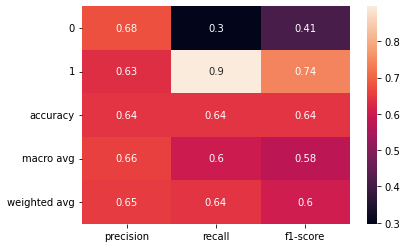

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
pred =  model.predict(x_train)
pred = np.argmax(pred,axis=1 )
y = np.argmax(y_train,axis=1 )
clf_report = classification_report(y,pred,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

Testing


In [ ]:
y = np.argmax(y_test,axis=1 )
y_index_0 = np.where(y == 0)
y_index_1 = np.where(y == 1)
len(y_index_0[0]),len(y_index_1[0])

(2436, 3306)

              precision    recall  f1-score   support

           0       0.69      0.28      0.40      2436
           1       0.63      0.91      0.74      3306

    accuracy                           0.64      5742
   macro avg       0.66      0.59      0.57      5742
weighted avg       0.66      0.64      0.60      5742



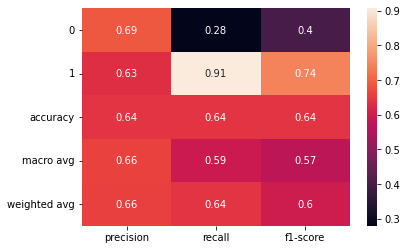

In [ ]:
pred =  model.predict(x_test)
pred = np.argmax(pred,axis=1 )
y = np.argmax(y_test,axis=1 )
print(classification_report(y, pred))
clf_report = classification_report(y,pred,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

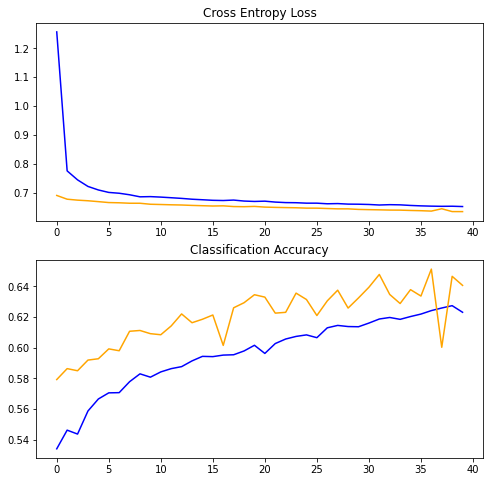

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

Model - 2

In [ ]:
model = Sequential()

size = 32
model.add(Conv2D(size, (3, 3), padding='same', input_shape=(64, 64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(size*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(size*4, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(size*8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))#softmax is used to get maximun value in a row

# initiate RMSprop optimizer
opt = tf.keras.optimizers.Adam(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


C:\Program Files\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
start = time.time()
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=40, batch_size=512, )
stop = time.time()

Epoch 1/40
45/45 [==============================] - 72s 2s/step - loss: 1.7589 - accuracy: 0.5567 - val_loss: 0.6726 - val_accuracy: 0.5754
Epoch 2/40
45/45 [==============================] - 70s 2s/step - loss: 0.6718 - accuracy: 0.5866 - val_loss: 0.6475 - val_accuracy: 0.6061
Epoch 3/40
45/45 [==============================] - 70s 2s/step - loss: 0.6386 - accuracy: 0.6335 - val_loss: 0.6152 - val_accuracy: 0.6742
Epoch 4/40
45/45 [==============================] - 70s 2s/step - loss: 0.6092 - accuracy: 0.6675 - val_loss: 0.5877 - val_accuracy: 0.6865
Epoch 5/40
45/45 [==============================] - 70s 2s/step - loss: 0.5877 - accuracy: 0.6852 - val_loss: 0.5740 - val_accuracy: 0.7072
Epoch 6/40
45/45 [==============================] - 70s 2s/step - loss: 0.5600 - accuracy: 0.7124 - val_loss: 0.5529 - val_accuracy: 0.7161
Epoch 7/40
45/45 [==============================] - 70s 2s/step - loss: 0.5424 - accuracy: 0.7218 - val_loss: 0.5548 - val_accuracy: 0.7093
Epoch 8/40
45/45 [==

In [ ]:
print(f"Training time: {stop - start}s")

Training time: 2751.9322850704193s


In [ ]:
model.save('model2.h5')


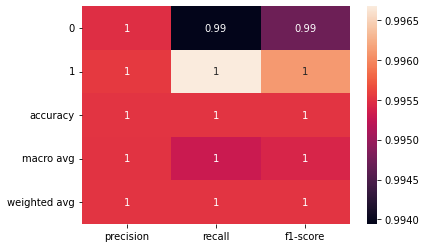

In [ ]:
pred =  model.predict(x_train)
pred = np.argmax(pred,axis=1 )
y = np.argmax(y_train,axis=1 )
clf_report = classification_report(y,pred,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      2436
           1       0.77      0.83      0.80      3306

    accuracy                           0.76      5742
   macro avg       0.75      0.75      0.75      5742
weighted avg       0.76      0.76      0.76      5742



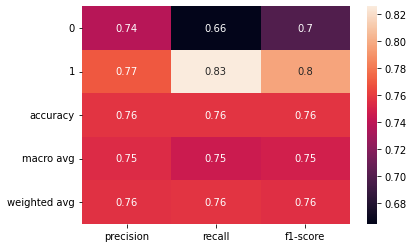

In [ ]:
pred =  model.predict(x_test)
pred = np.argmax(pred,axis=1 )
y = np.argmax(y_test,axis=1 )
print(classification_report(y, pred))
clf_report = classification_report(y,pred,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

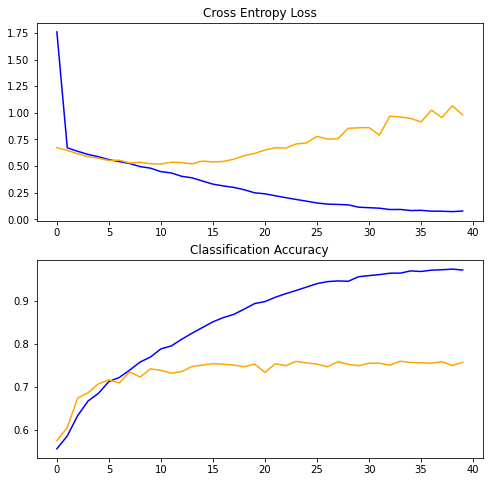

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')